# **Data Collection and Cleaning**

## Objectives

* Load and interpret the dataset downloaded from: https://survey.stackoverflow.co/2024, note the dataset was in zip format and has been unzipped on my local machine and then loaded directly into the workspace.

## Inputs

* inputs/developer_salary_survey/survey_results_public.csv 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/portfolio-project-5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/portfolio-project-5'

# Install required toolkits

Install pandas and matplotlib for dataset analyses and manipulation

In [4]:
!pip install pandas matplotlib scikit-learn

Import dependecies

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

---

# Loading, Cleaning and Intepreting dataset

Loading dataset

In [6]:
df = pd.read_csv("inputs/developer_salary_survey/survey_results_public.csv")

In [7]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Next we want to clean the dataframe and take out only the relevant information to the business requirement of that being the salary earned by software engineers in the workplace, years of experience and their qualification/education level. We also rename ConvertedCompYearly (the employees salary converted to US Dollars) to Salary.

In [8]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United States of America,Primary/elementary school,NaN,"Employed, full-time",NaN
1,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Employed, full-time",NaN
3,Canada,Some college/university study without earning ...,NaN,"Student, full-time",NaN
4,Norway,"Secondary school (e.g. American high school, G...",NaN,"Student, full-time",NaN


We now want to only have data of an employee where they are earning a salary. (**Please note that this is an annual salary**)

In [9]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
72,Pakistan,"Secondary school (e.g. American high school, G...",1,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time",30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",91295.0
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,Some college/university study without earning ...,7,"Employed, full-time;Student, part-time",110000.0


We now want to clean the dataframe more to only include datasets that have data.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23435 non-null  object 
 1   EdLevel       23435 non-null  object 
 2   YearsCodePro  23345 non-null  object 
 3   Employment    23435 non-null  object 
 4   Salary        23435 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [11]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

Next we want to only include employees that are employed full-time and then we can drop this column.

In [12]:
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17527 entries, 374 to 41185
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       17527 non-null  object 
 1   EdLevel       17527 non-null  object 
 2   YearsCodePro  17527 non-null  object 
 3   Salary        17527 non-null  float64
dtypes: float64(1), object(3)
memory usage: 684.6+ KB


Next we want to clean the Country data.

In [13]:
df['Country'].value_counts()

Country
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
                                                        ... 
Botswana                                                   1
Barbados                                                   1
Senegal                                                    1
Suriname                                                   1
Mali                                                       1
Name: count, Length: 155, dtype: int64

As we can see there are a lot of countries with just a few or 1 data entry and this would not be able to give an accurate representation of that countries software engineer salary. So we will amalgamate the countries with low data points into a single country called **Other**.

In [14]:
def shorten_categories(categories, cutoff):
    """
    Takes country value counts and checks to see if they are greater or less than the cutoff value,
    if less than, the country is added to a new category 'Other'.
    """
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

We set the 'cutoff' value to 400 so as to leave the countries with enough datapoints to make a good prediction, the rest are amalgamated into the category 'Other' when we call the custom function, 'shorten_categories'.

In [15]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
Other                                                   5628
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
France                                                   719
Canada                                                   684
Brazil                                                   457
Spain                                                    431
Italy                                                    414
Netherlands                                              406
Australia                                                400
Name: count, dtype: int64

Next we will inspect the salary by country.

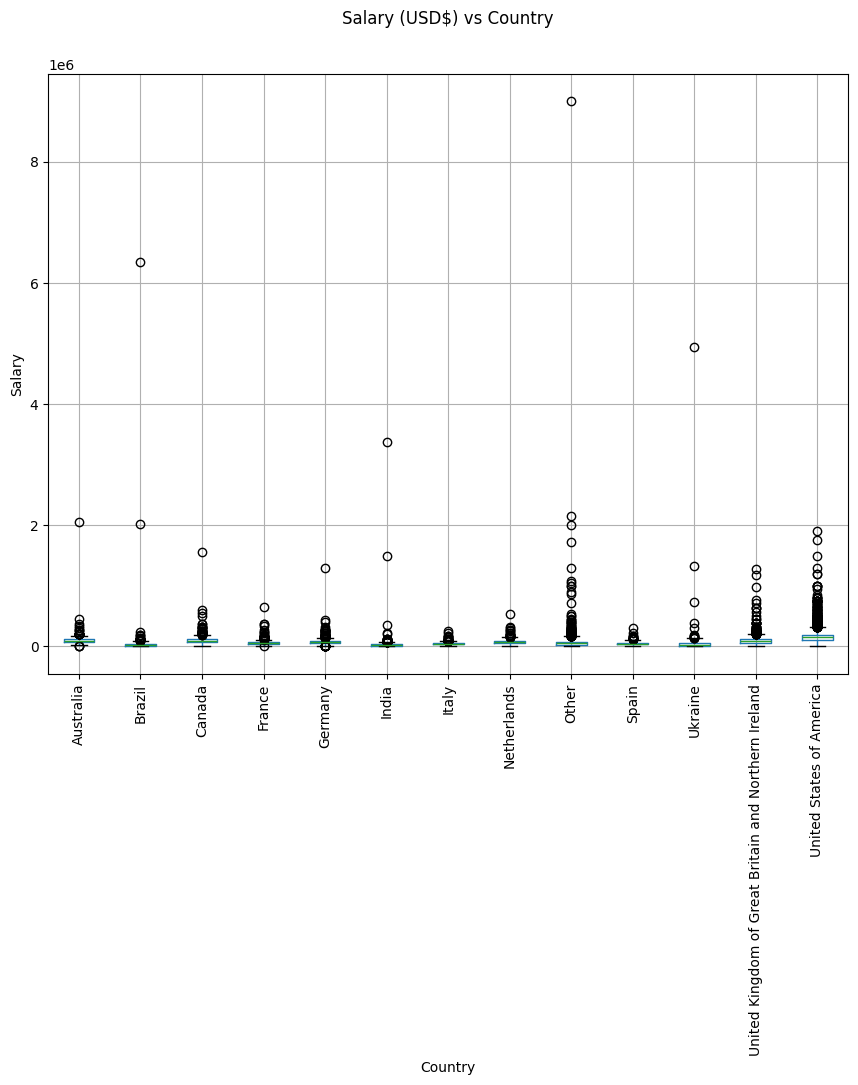

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (USD$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

As we can see there are quite a few outliers (Salary per Country per Fulltime employee) in the above boxplot, so we wish to keep only salaries that are within the median range being $250000 but more than $10000 per annum as a full-time employee.

In [17]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]

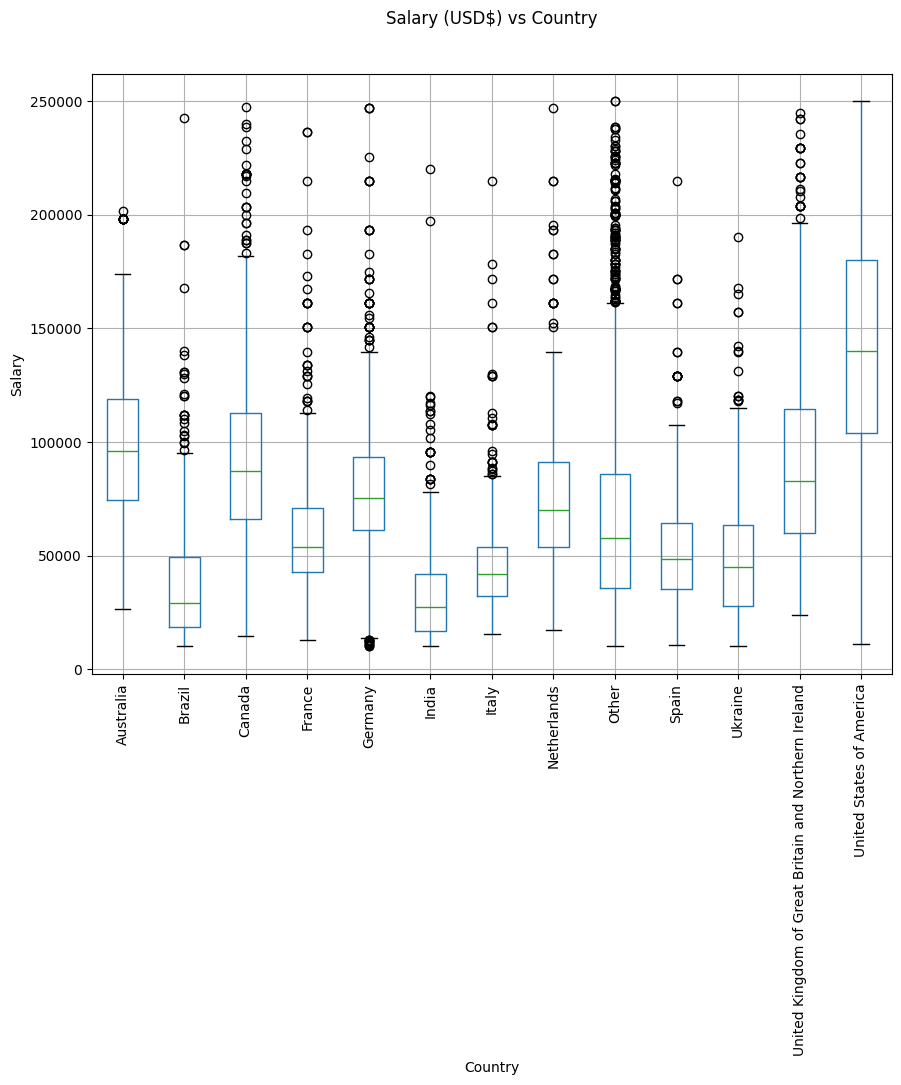

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (USD$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

Now that we have cleaned up the outliers and brought the dataset into a more practical salary range we can see the median ranges for salaries per country a lot clearer now and have a better understanding of them. There are still a few outliers but not as many or as extreme as before cleaning the dataset.

In [19]:
df["YearsCodePro"].unique()

array(['6', '18', '25', '30', '20', '50', '27', '1', '15', '11', '23',
       '17', '10', '8', '12', '26', '9', '40', '4', '14', '7', '22', '28',
       '44', '13', '16', '3', '35', '5', '31', '41', '36',
       'Less than 1 year', '24', '2', '38', '32', '21', '19', '34', '29',
       '43', '33', '45', '37', '42', '39', '46', '49', '48', '47'],
      dtype=object)

Next we look at years of experience and as we see it is a string but with 'less than 1 year' value not as a number, so we can convert that into a number for use later.

In [20]:
def clean_experience(x):
    """
    Removes any string from the from the df.
    """
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)
df["YearsCodePro"].unique()

array([ 6. , 18. , 25. , 30. , 20. , 50. , 27. ,  1. , 15. , 11. , 23. ,
       17. , 10. ,  8. , 12. , 26. ,  9. , 40. ,  4. , 14. ,  7. , 22. ,
       28. , 44. , 13. , 16. ,  3. , 35. ,  5. , 31. , 41. , 36. ,  0.5,
       24. ,  2. , 38. , 32. , 21. , 19. , 34. , 29. , 43. , 33. , 45. ,
       37. , 42. , 39. , 46. , 49. , 48. , 47. ])

Now we have all the years of experience converted to useable float format. 

We will now also clean the education data sets.

In [21]:
df["EdLevel"].unique()

array(['Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Something else'], dtype=object)

In [22]:
def clean_education(x):
    """
    Simplifies the education levels into more globally recognized categories.
    """
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x:
        return 'Post grad'
    return 'Less than a Bachelor’s'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

We can now see a simplified and universal educational qualification levels.

In [23]:
df["EdLevel"].unique()

array(['Post grad', 'Master’s degree', 'Less than a Bachelor’s',
       'Bachelor’s degree'], dtype=object)

Now that the data is almost all cleaned we need to process the string or float variables into data the ML model can interpret and for that we will transform the Education levels and countries to integers using Label Encoder from Scikit Learn. 

In [24]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([3, 2, 1, 0])

As you can see we now have the data in an integer format but it is paired to the lable via the LabelEncoder form SciKit Learn. We will do the same for country.

In [25]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([ 8, 11, 12,  3,  4,  1,  2,  6,  5, 10,  9,  7,  0])

---

# Training the model

Now we will begin training our model to predict a software engineers potential salary based off the variables we have selected and cleaned, YEARS OF EXPERIENCE(In software development), QUALIFICATION, LOCATION(Country).

Below we create our label and features, being that of predicting the salary with the features described above.

In [26]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

Now we need to try out differenet ML model to find the best fit for predicting a software engineers salary.

First we will try a linear regression model as we are trying to predict a number as opposed to a classification.

In [27]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [28]:
y_pred = linear_reg.predict(X)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$44,651.48


As we see above the mean squared error value in $Dollar terms is very high when taken it into context of the defined salary range previously defined in the notebook of $10000 to $250000 per annum. So we will try further models and see if we can get a lower average deviation for slary predictions.

In [30]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [31]:
y_pred = dec_tree_reg.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$32,910.40


Using the Decision Tree Regressor method we can see that we have a much lower deviation than the linear regresion method previously used. However we could still get this lower so we will try one more method, the Random Forest Regressor method.

In [32]:
from sklearn.ensemble import RandomForestRegressor
rand_forest_reg = RandomForestRegressor(random_state=0)
rand_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [33]:
y_pred = rand_forest_reg.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$33,004.19


Again the deviation is quite high in context to the predictable salary, so we can fine tune the methods by testing them with different parameters. So we will use Grid Search with Cross Validation, to enter different parameters and hopefullly fine tune our method.

In [34]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

As we can see the best estimator model would be the Decision Tree Regressor method with a max depth of 8. So we get those parameters by using the gs.best_estimator_ and apply that to our model.

In [35]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$34,502.94


As we see the deviation is higher than the lowest we have obtained earlier in the decision tree step, however we will still use this best method with said parameters as it could be due to random variables even though we set the random state to 0.

We will now explore how we can apply this model to user input data and predict a potential employees salary in a chosen country with a given amount of work experience.

In [36]:
X

,Country,EdLevel,YearsCodePro
374,8,3,6.0
379,8,2,6.0
392,11,3,18.0
395,11,2,25.0
398,12,1,30.0
...,...,...,...
41164,12,0,13.0
41167,12,1,25.0
41180,8,2,3.0
41184,12,2,30.0


Fake user inputs to test the model

In [37]:
# Country, Education Level, Years of Coding Experience
X = np.array([["United Kingdom of Great Britain and Northern Ireland", 'Bachelor’s degree', 3]])
X

array([['United Kingdom of Great Britain and Northern Ireland',
        'Bachelor’s degree', '3']], dtype='<U52')

We now apply the label encoder to transform the country and qualification to integers and then transform all the data into a float format.

In [38]:
X[:, 0] = le_country.transform(X[:, 0])
X[:, 1] = le_education.fit_transform(X[:,1])
X = X.astype(float)
X

array([[11.,  0.,  3.]])

We can now put these inputs into our regressor model and predict the potential salary for our fake user.

In [39]:
y_pred = regressor.predict(X)
y_pred

/workspace/.pip-modules/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([56552.3258427])

Our fake user would have a predicted salary of $56552.33 per annum with their user input of Country: United Kingdom of Great Britain and Northern Ireland, Education level: Bachelor's Degree and Years of Coding Experience: 3.

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [40]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (2852421808.py, line 5)